# Feature Engineering 1
- 가장 적합한 특성을 찾는 것

 - Generation
    - Binarization, Quantization
    - Scaling (normalization)
    - Interaction features
    - Log transformation
- Selection
    - Univariate statics
    - Model-based selection
    - Iterative feature selection
    - Feature removal

## Log transformations
- 데이터의 분포가 극단적으로 모였을 때 (poisson)
- 선형 모델은 데이터가 정규분포일 때 적합함.
- Poisson -> Normal distribution
- ex) 로그인 카운트, 제품 판매량, 검색 단어, 친구 수
- `np.log` or `np.exp` 등의 함수를 사용

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [37]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size = (1000, 3)) # 1000 x 3 크기의 정규분포를 따르는 랜덤한 값
w = rnd.normal(size = 3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

Text(0.5, 0, 'Value')

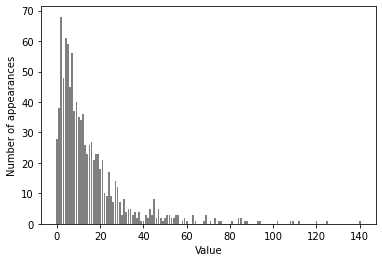

In [41]:
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color = 'gray')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

In [42]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Test score : {:.3f}".format(score))

Test score : 0.622


- Log transformation

In [43]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

Text(0.5, 0, 'Value')

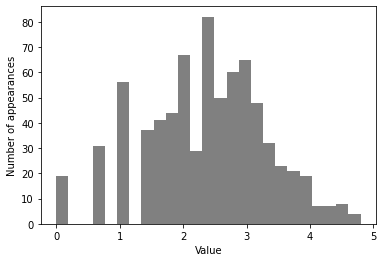

In [45]:
plt.hist(X_train_log[:, 0], bins = 25, color = 'gray')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

- 포아송 분포를 따를 때보다 정규분포를 따를 때 R2 score가 더 좋아짐.

In [46]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Test score : {:.3f}".format(score))

Test score : 0.875
